## Vodafone Customer Churn Predictor

### 1. `Business Understanding`

##### 1.1 **Problem Statement:** Vodafone, a leading telecommunications provider, is struggling with customer retention in an increasingly competitive market. To maintain its market position and improve customer loyalty, Vodafone needs to understand why customers leave and predict potential churners. The company plans to leverage historical data and analytics to develop a predictive model that identifies at-risk customers and informs effective retention strategies.


##### 1.2 **Project Goal:** The goal of this project is to develop a predictive model using historical customer data and advanced analytics techniques to accurately identify customers at risk of churning. By doing so, the company aims to gain actionable insights into the factors driving customer churn using the datasets provided by the business team and implement targeted retention strategies to enhance customer loyalty and reduce churn rates.


##### 1.3 **Stakeholder:**
- Executive Leadership
- Business Team
- Data Science & Analytics Team
- Customer Service Team
- Sales Team


##### 1.4 **Key Metrics and Success Criteria:**
- Accuracy: The ratio of correctly predicted instances (both churn and non-churn) to the total instances.
    - Success Criteria: An accuracy rate of at least 85% indicates the model is reliably identifying churn and non-churn customers.

- Precision: The ratio of correctly predicted churn instances to the total predicted churn instances.
    - Success Criteria: A precision rate of at least 80% ensures that most customers identified as churners are indeed at risk, minimizing false positives.

- F1 Score: The harmonic mean of precision and recall, providing a single metric that balances both.
    - Success Criteria: An F1 score of at least 0.80 ensures a good balance between precision and recall.

- Churn Rate: The percentage of customers who leave the company over a specific period.
    - Success Criteria: A decrease in the churn rate by at least 10% after implementing the churn prediction model.

- ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): Measures the model's ability to distinguish between churn and non-churn customers.
    - Success Criteria: An ROC-AUC score of at least 0.8 indicates strong discriminatory power.

- Baseline Models: There should be at least 4 Baseline Models

- Hyperparameter Tuning: Hypereparamter Tuning should only be applied to models that exceed their F1-score of 0.8


##### 1.5 **Features of the Dataset:**
1. CustomerID: Unique identifier for each customer.
2. Gender: Gender of the customer (Male/Female).
3. Senior Citizen: Indicates if the customer is a senior citizen (1: True, 0: False).
4. Partner: Indicates if the customer has a partner (1: True, 0: False).
5. Dependents: Indicates if the customer has dependents (1: True, 0: False).
6. Tenure: Number of months the customer has been with Vodafone.
7. Phone Service: Indicates if the customer has a phone service (1: True, 0: False).
8. Multiple Lines: Indicates if the customer has multiple lines (Yes, No, No phone service).
9. Internet Service: Type of internet service the customer has (DSL, Fiber optic, No).
10. Online Security: Indicates if the customer has online security service (Yes, No, No internet service).
11. Online Backup: Indicates if the customer has online backup service (Yes, No, No internet service).
12. Device Protection: Indicates if the customer has device protection service (Yes, No, No internet service).
13. Tech Support: Indicates if the customer has tech support service (Yes, No, No internet service).
14. Streaming TV: Indicates if the customer has streaming TV service (Yes, No, No internet service).
15. Streaming Movies: Indicates if the customer has streaming movies service (Yes, No, No internet service).
16. Contract: Type of contract the customer has (Month-to-month, One year, Two year).
17. Paperless Billing: Indicates if the customer has paperless billing (1: True, 0: False).
18. Payment Method: Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
19. Monthly Charges: The amount charged to the customer monthly.
20. Total Charges: The total amount charged to the customer.
21. Churn: Indicates if the customer has churned (1: True, 0: False).

##### 1.6 **Hypothesis**

- 1.6.1 **Null Hypothesis(H0):** There is no significant relationship between customer churn and contract type, tenure, and monthly charges.

- 1.6.2 **Alternative Hypothesis(H1):** There is a significant relationship between customer churn and contract type, tenure, and monthly charges.


##### 1.7 **Analytical Questions:**
1. How does the distribution of contract types (month-to-month, one year, two years) affect the overall churn rate?
2. Is there a pattern in churn rate based on customer tenure? Are there specific points in the customer lifecycle where churn is more likely?
3. Do customers with higher monthly charges tend to churn more often? Are there any specific thresholds where churn increases significantly?
4. How do different combinations of additional services (online security, online backup, device protection, tech support) impact churn rate?
5. Does the preferred payment method influence churn rate? Are certain payment methods associated with higher churn?
6. Are there demographic factors (like senior citizen status, having a partner, or having dependents) that correlate with higher churn rates?

### 2. `Data Understanding`

##### 2.1 **Importations**

In [1]:
# Data Manipulation packages

import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

warnings.filterwarnings('ignore')

##### 2.2 **Load Datasets**

In [2]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials from .env file
database = environment_variables.get("database")
server = environment_variables.get("server")
user = environment_variables.get("user")
password = environment_variables.get("password")
 
# create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={user};PWD={password}"

In [3]:
# Using the connect method of the pyodbc library to pass in the connection string
connection = pyodbc.connect(connection_string)

# what tables are in the Database
db_query = '''SELECT *
FROM INDIVIDUAL_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE'''

- 2.2.1 **Telco_churn_first_3000**

In [4]:
# Querying the Database to determine the tables we are to use for analysis and modelling
query1 = "Select * from dbo.LP2_Telco_churn_first_3000"

voda1 = pd.read_sql(query1, connection)
voda1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


- 2.2.2 **Telco_churn_second_2000**

In [5]:
# File path for the 2nd dataset for analysis and modelling
file_path1 = '../data/LP2_Telco-churn-second-2000.csv'

# Load the file into the notebook
voda2 = pd.read_csv(file_path1)
voda2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


##### 2.3 **Expolatory Data Analysis (EDA)** 

- 2.3.1 **Data Quality Assessment & Exploring data**

In [6]:
voda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [7]:
voda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [8]:
# Renaming columns to align properly with other columns

voda1.rename(columns = {
    'customerID': 'CustomerID',
    'gender': 'Gender',
    'tenure': 'Tenure'
}, inplace = True)

voda2.rename(columns = {
    'customerID': 'CustomerID',
    'gender': 'Gender',
    'tenure': 'Tenure'
}, inplace = True)

In [21]:
# Regularizing each fields of both Datasets by ensuring all Datatypes align correctly and ensuring that all values in each rows are consistent

voda2['TotalCharges'] = pd.to_numeric(voda2['TotalCharges'], errors='coerce') # Changing from'object'dtype to 'float' dtype
voda1['MonthlyCharges'] = voda1['MonthlyCharges'].apply(lambda x: round(x, 2)) # Rounding up each value of the field from 6 decimal places to 2 decimal places
voda1['TotalCharges'] = voda1['TotalCharges'].apply(lambda x: round(x, 2)) # Rounding up each value of the field from 6 decimal places to 2 decimal places
voda1['Churn'] = voda1['Churn'].astype(bool) # Changing from object dtype to boolean dtype
voda2['SeniorCitizen'] = voda2['SeniorCitizen'].astype(bool)

# Dictionary mapping for conversion from object dtype to boolean
mapping1 = {'Yes': True, 'No': False}

# Replace values in Churn column
voda2['Churn'] = voda2['Churn'].replace(mapping1)
voda2['Partner'] = voda2['Partner'].replace(mapping1)
voda2['Dependents'] = voda2['Dependents'].replace(mapping1)
voda2['PhoneService'] = voda2['PhoneService'].replace(mapping1)
voda2['PaperlessBilling'] = voda2['PaperlessBilling'].replace(mapping1)


In [54]:
# Mapping dictionary for conversion from object dtype ('True', 'False' and 'None') to object dtype ('Yes', 'No' and 'No phone service')
multiple_lines_map = {True: 'Yes', False: 'No'}

# Apply mapping function for Yes/No conversion (optional)
def convert_yes_no(value):
  if value in multiple_lines_map:
    return multiple_lines_map[value]
  else:
    return value

# Replace values with strings for clarity
voda1['MultipleLines'] = voda1['MultipleLines'].replace(multiple_lines_map)

# Set None values to "No phone service"
voda1.loc[voda1['MultipleLines'].isna(), 'MultipleLines'] = 'No phone service'

In [58]:
# Mapping dictionary for conversion from object dtype ('True', 'False' and 'None') to object dtype ('Yes', 'No' and 'No internet service')
mapping2 = {True: 'Yes', False: 'No'}

# Apply mapping function for Yes/No conversion (optional)
def convert_yes_no(value):
  if value in mapping2:
    return mapping2[value]
  else:
    return value

# Replace values with strings for clarity
voda1['OnlineSecurity'] = voda1['OnlineSecurity'].replace(mapping2)
voda1['OnlineBackup'] = voda1['OnlineBackup'].replace(mapping2)
voda1['DeviceProtection'] = voda1['DeviceProtection'].replace(mapping2)
voda1['TechSupport'] = voda1['TechSupport'].replace(mapping2)
voda1['StreamingTV'] = voda1['StreamingTV'].replace(mapping2)
voda1['StreamingMovies'] = voda1['StreamingMovies'].replace(mapping2)



# Set None values to "No internet service"
voda1.loc[voda1['OnlineSecurity'].isna(), 'OnlineSecurity'] = 'No internet service'
voda1.loc[voda1['OnlineBackup'].isna(), 'OnlineBackup'] = 'No internet service'
voda1.loc[voda1['DeviceProtection'].isna(), 'DeviceProtection'] = 'No internet service'
voda1.loc[voda1['TechSupport'].isna(), 'TechSupport'] = 'No internet service'
voda1.loc[voda1['StreamingTV'].isna(), 'StreamingTV'] = 'No internet service'
voda1.loc[voda1['StreamingMovies'].isna(), 'StreamingMovies'] = 'No internet service'

In [60]:
voda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        3000 non-null   object 
 1   Gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   Tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [61]:
voda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        2043 non-null   object 
 1   Gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   bool   
 3   Partner           2043 non-null   bool   
 4   Dependents        2043 non-null   bool   
 5   Tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   bool   
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   bool   


In [63]:
# Merging the 2 datasets together

voda_merged = pd.concat([voda1, voda2], ignore_index = True)
voda_merged.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,No phone service,DSL,No,...,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,No,DSL,Yes,...,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,...,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,False,False,False,45,False,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,No,Fiber optic,No,...,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True


In [64]:
voda_merged.tail()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,False,True,True,24,True,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,True,Mailed check,84.80,1990.50,False
5039,2234-XADUH,Female,False,True,True,72,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,True,Credit card (automatic),103.20,7362.90,False
5040,4801-JZAZL,Female,False,True,True,11,False,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,True,Electronic check,29.60,346.45,False
5041,8361-LTMKD,Male,True,True,False,4,True,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,True,Mailed check,74.40,306.60,True
5042,3186-AJIEK,Male,False,False,False,66,True,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,True,Bank transfer (automatic),105.65,6844.50,False


In [66]:
# Find duplicate rows (considering all columns)
duplicates = voda_merged.duplicated()

In [67]:
voda_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5043 non-null   object 
 1   Gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   bool   
 3   Partner           5043 non-null   bool   
 4   Dependents        5043 non-null   bool   
 5   Tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   bool   
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   bool   


In [68]:
voda_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5043.0,32.576641,24.529807,0.0,9.000,29.00,56.00,72.00
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.55,90.05,118.65
TotalCharges,5035.0,2302.062860,2269.483575,18.8,417.675,1401.15,3862.00,8670.10


In [70]:
voda_merged.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5043,2,False,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,5043,2,False,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5043,2,False,3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
PhoneService,5043,2,True,4554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5043,3,No,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5043,3,No,2507,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Separating Numerical and categorical variables for easy analysis and EDA

cat_cols = voda_merged.select_dtypes(include=['object', 'bool']).columns
num_cols = voda_merged.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:")
print(cat_cols)

print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')
Numerical Variables:
['Tenure', 'MonthlyCharges', 'TotalCharges']


- 2.3.2 **Univariate Analysis**

Tenure
Skew : 0.23


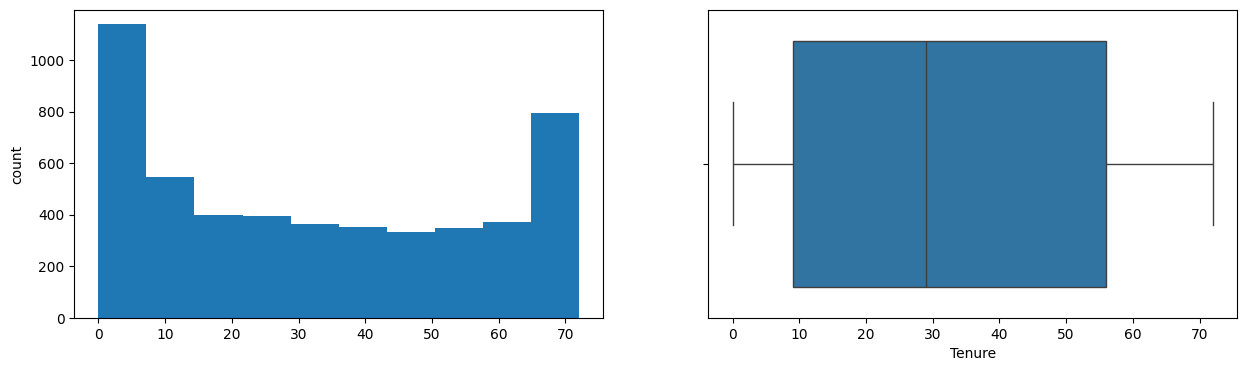

MonthlyCharges
Skew : -0.24


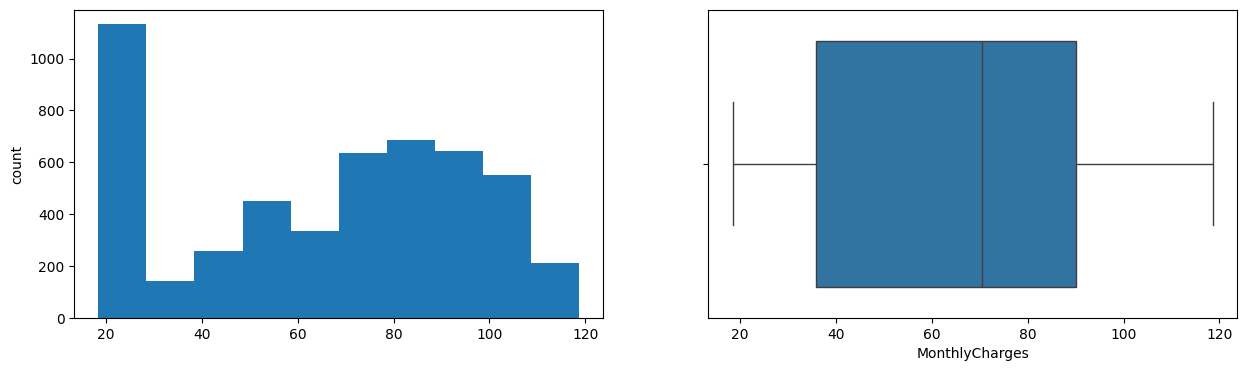

TotalCharges
Skew : 0.94


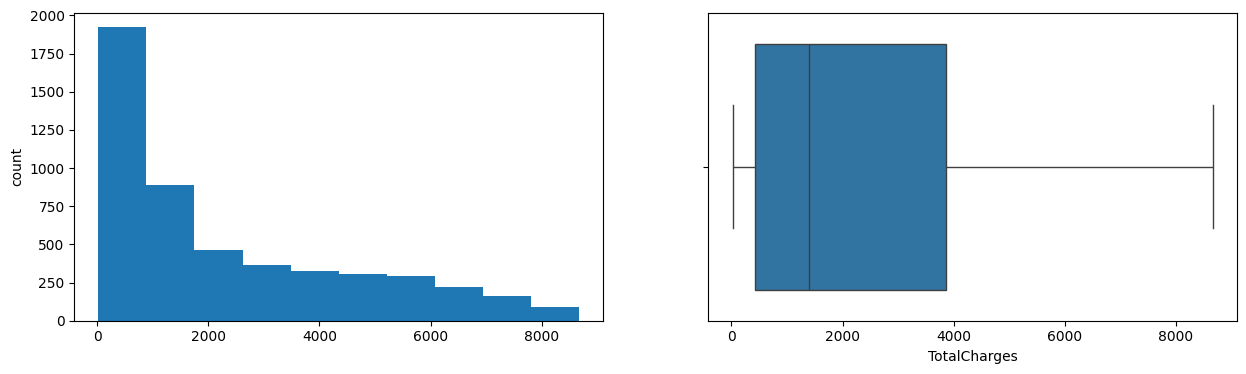

In [74]:
# Univariate analysis for the 3 numerical columns

for col in num_cols:
    print(col)
    print('Skew :', round(voda_merged[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)

    voda_merged[col].hist(grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = voda_merged[col])
    plt.show()

In [ ]:
# Univariate analysis for selected categorical columns. Categorical variables are being visualized using a count plot.

fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Contract', voda_merged = voda_merged, color = 'blue', 
              order = voda_merged['Contract'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Churn', voda_merged = voda_merged, color = 'blue', 
              order = voda_merged['Churn'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'PaymentMethod', voda_merged = voda_merged, color = 'blue', 
              order = voda_merged['PaymentMethod'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'SeniorCitizen', voda_merged = voda_merged, color = 'blue', 
              order = voda_merged['SeniorCitizen'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'InternetService', voda_merged = voda_merged, color = 'blue', 
              order = voda_merged['InternetService'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'MultipleLines', voda_merged = voda_merged, color = 'blue', 
              order = voda_merged['MultipleLines'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

##### 2.6 **Key Insights**

1. Some column names were not proper types (customerID, gender, and tenure). Rename them for consistency purposes 
2. Datatypes and row values for some fields in both datasets are not consistent. These fields are SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, PaymentMethod, TotalCharges and Churn.
- The TotalCharges field in the voda2 dataset is of object dtype. This needs to be converted to float dtype.
- The Churn field in voda 1 dataset was changed from object dtype to bool dtype.
- The Churn, SeniorCitizen, Partner, Dependents, PhoneService, and PaperlessBilling in the voda2 dataset were changed to bool dtypes.
- The MonthlyCharges and TotalCharges in voda2 dataset were rounded up to 2 decimal places.
- Values in the MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies in the voda1 dataset were changed from True, False, and None to Yes, No, and No phone/internet service for consistency with values in each of the fields in voda2 dataset.
3. Missing values noticed were all in the voda1 dataset. Below is a breakdown:
- MultipleLines     269 null values
- OnlineSecurity    651 null values
- OnlineBackup      651 null values
- DeviceProtection  651 null values
- TechSupport       651 null values
- StreamingTV       651 null values
- StreamingMovies   651 null values
- TotalCharges      5 null values
- Churn             1 null value
4. No duplicated values found in the merged dataset


### `Data Preparation`

### `Modeling & Evaluation`

### `Deployment`

##### Not applicable in this project